<a href="https://colab.research.google.com/github/3vmmar/emotion-detection/blob/main/Deepface_Emotion_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install deepface


In [2]:
!pip install facenet_pytorch

In [4]:
import cv2
from google.colab.patches import cv2_imshow

def crop_faces(rects, img_path):
    image = cv2.imread(img_path)
    cropped_faces = []

    for rect in rects:
        top_left, bottom_right = rect
        x1, y1 = top_left
        x2, y2 = bottom_right

        cropped_face = image[y1:y2, x1:x2]
        cropped_faces.append(cropped_face)

    return cropped_faces

rects = [
    [(7, 10), (20, 30)],
    [(75, 10), (86, 45)],
    [(17, 70), (29, 80)],
    [(75, 90), (86, 95)]
]
img_path = '/content/meeeeeee.jpg'

cropped_faces = crop_faces(rects, img_path)

for i, face in enumerate(cropped_faces):
    cv2_imshow(face)
cv2.waitKey(1)
cv2.destroyAllWindows()

25-05-15 20:12:42 - Directory /root/.deepface has been created
25-05-15 20:12:42 - Directory /root/.deepface/weights has been created


Action: age:   0%|          | 0/3 [00:00<?, ?it/s]    Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5


25-05-15 20:12:45 - age_model_weights.h5 will be downloaded...



  0%|          | 0.00/539M [00:00<?, ?B/s]
  2%|▏         | 12.6M/539M [00:00<00:04, 125MB/s]
  6%|▌         | 31.5M/539M [00:00<00:03, 162MB/s]
 11%|█         | 57.1M/539M [00:00<00:02, 202MB/s]
 16%|█▌        | 84.4M/539M [00:00<00:01, 229MB/s]
 21%|██        | 114M/539M [00:00<00:01, 249MB/s] 
 26%|██▌       | 140M/539M [00:00<00:01, 252MB/s]
 31%|███       | 166M/539M [00:00<00:01, 246MB/s]
 36%|███▌      | 191M/539M [00:00<00:01, 248MB/s]
 41%|████▏     | 223M/539M [00:00<00:01, 268MB/s]
 47%|████▋     | 252M/539M [00:01<00:01, 273MB/s]
 53%|█████▎    | 284M/539M [00:01<00:00, 285MB/s]
 58%|█████▊    | 312M/539M [00:01<00:00, 234MB/s]
 64%|██████▍   | 345M/539M [00:01<00:00, 257MB/s]
 69%|██████▉   | 374M/539M [00:01<00:00, 266MB/s]
 75%|███████▍  | 403M/539M [00:01<00:00, 270MB/s]
 80%|████████  | 432M/539M [00:01<00:00, 273MB/s]
 85%|████████▌ | 460M/539M [00:01<00:00, 212MB/s]
 90%|████████▉ | 484M/539M [00:03<00:00, 58.0MB/s]
 93%|█████████▎| 502M/539M [00:03<00:00, 64.7MB/s]

25-05-15 20:12:53 - gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  2%|▏         | 11.5M/537M [00:00<00:04, 112MB/s]
  6%|▌         | 32.0M/537M [00:00<00:03, 163MB/s]
 11%|█         | 58.7M/537M [00:00<00:02, 210MB/s]
 16%|█▌        | 85.5M/537M [00:00<00:01, 231MB/s]
 21%|██        | 111M/537M [00:00<00:01, 238MB/s] 
 25%|██▌       | 135M/537M [00:00<00:01, 230MB/s]
 29%|██▉       | 158M/537M [00:00<00:01, 219MB/s]
 34%|███▎      | 181M/537M [00:00<00:01, 221MB/s]
 38%|███▊      | 207M/537M [00:00<00:01, 228MB/s]
 43%|████▎     | 231M/537M [00:01<00:01, 233MB/s]
 48%|████▊     | 260M/537M [00:01<00:01, 247MB/s]
 53%|█████▎    | 285M/537M [00:01<00:01, 240MB/s]
 58%|█████▊    | 309M/537M [00:01<00:01, 225MB/s]
 62%|██████▏   | 332M/537M [00:01<00:00, 212MB/s]
 66%|██████▋   | 356M/537M [00:01<00:00, 218MB/s]
 70%|███████   | 379M/537M [00:01<00:

25-05-15 20:12:58 - facial_expression_model_weights.h5 will be downloaded...



100%|██████████| 5.98M/5.98M [00:00<00:00, 69.6MB/s]
Action: emotion: 100%|██████████| 3/3 [00:16<00:00,  5.35s/it]


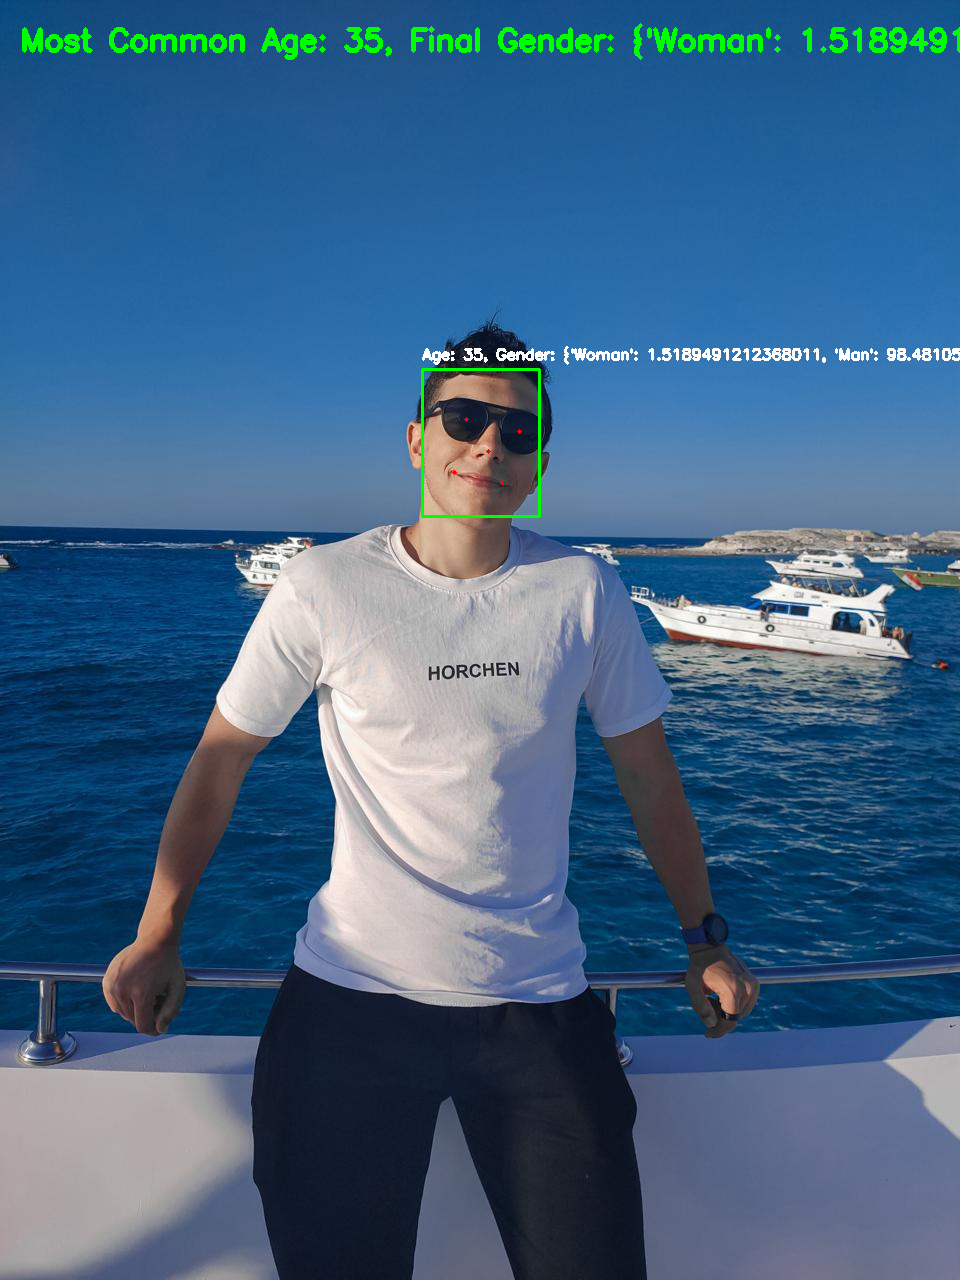

Final Results: Most Common Age = 35, Final Gender = {'Woman': 1.5189491212368011, 'Man': 98.48105311393738}, Final Emotion = happy


In [5]:
import cv2
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt
from facenet_pytorch import MTCNN
from deepface import DeepFace
from PIL import Image
from google.colab.patches import cv2_imshow

mtcnn = MTCNN(keep_all=True)

img_path = '/content/meeeeeee.jpg' # Replace with the correct image path
image = cv2.imread(img_path)

# Convert the image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_pil = Image.fromarray(image_rgb)

# Detect faces and landmarks using MTCNN
boxes, probs, landmarks = mtcnn.detect(image_pil, landmarks=True)

# Check if any faces are detected
if boxes is None:
    print("No faces detected.")
else:
    landmarks = np.array(landmarks)

    ages = []
    genders = []

    def analyze_face(image, box):
        x1, y1, x2, y2 = [int(b) for b in box]
        face_crop = image[y1:y2, x1:x2]
        face_rgb = cv2.cvtColor(face_crop, cv2.COLOR_BGR2RGB)
        analysis = DeepFace.analyze(face_rgb, actions=['age', 'gender', 'emotion'], enforce_detection=False)
        return analysis

    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = [int(b) for b in box]
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Draw facial landmarks
        for (x, y) in landmarks[i]:
            cv2.circle(image, (int(x), int(y)), 2, (0, 0, 255), -1)

        # Analyze the face
        analysis = analyze_face(image, box)

        if isinstance(analysis, list):
            analysis = analysis[0]

        age = int(analysis['age'])  # Extract the actual age value
        gender = str(analysis['gender'])  # Extract the actual gender value

        ages.append(age)
        genders.append(gender)

        emotion = analysis['dominant_emotion']
        label = f"Age: {age}, Gender: {gender}, Emotion: {emotion}"
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # Find the most common age and gender
    most_common_age = Counter(ages).most_common(1)[0][0]
    most_common_gender = Counter(genders).most_common(1)[0][0]

    final_label = f"Most Common Age: {most_common_age}, Final Gender: {most_common_gender}"
    cv2.putText(image, final_label, (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3)

    cv2_imshow(image)

    print(f"Final Results: Most Common Age = {most_common_age}, Final Gender = {most_common_gender}, Final Emotion = {emotion}")
